### Mass Analysis for 55 analytes
###  Edgar Acuna
#### July 2021

In [90]:
import scipy.io
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
%matplotlib inline
mat = scipy.io.loadmat('C:/Users/eacun/Downloads/dataset55_release2.mat')

### Loading the data

In [91]:
mat.items()

dict_items([('__header__', b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Wed Jul 22 14:13:11 2020'), ('__version__', '1.0'), ('__globals__', []), ('addedNoisePercent', array([[0.1],
       [0.5],
       [0. ],
       ...,
       [1. ],
       [0.1],
       [0. ]])), ('labels', array([[ 1],
       [ 1],
       [ 1],
       ...,
       [55],
       [55],
       [55]], dtype=uint8)), ('massLoadings', array([[90.48134734],
       [90.48134734],
       [90.48134734],
       ...,
       [93.56603952],
       [93.56603952],
       [93.56603952]])), ('spectra', array([[0.01684698, 0.01575019, 0.01553012, ..., 0.01631328, 0.01523777,
        0.01464116],
       [0.01862416, 0.01217942, 0.02092375, ..., 0.01522821, 0.02158774,
        0.01224737],
       [0.01634829, 0.01627708, 0.01620733, ..., 0.01681628, 0.01679286,
        0.0167685 ],
       ...,
       [0.01777366, 0.02470746, 0.04042846, ..., 0.52899222, 0.53342443,
        0.54125978],
       [0.03112273, 0.02996503, 0.03299245, 

In [92]:
subs=mat['substrateSpectra']
subs=pd.DataFrame(subs)
subs

,0,1,2,3,4,5,6,7,8,9,...,1691,1692,1693,1694,1695,1696,1697,1698,1699,1700
0,0.008192,0.008116,0.008042,0.007970,0.007899,0.007830,0.007763,0.007697,0.007633,0.007570,...,0.010966,0.010943,0.010919,0.010895,0.010870,0.010845,0.010818,0.010792,0.010765,0.010737
1,0.035105,0.035617,0.036458,0.037003,0.037084,0.036102,0.035552,0.035033,0.034687,0.034424,...,0.040834,0.040778,0.040760,0.040794,0.040865,0.040946,0.041008,0.041036,0.041051,0.041070
2,0.585617,0.585672,0.585179,0.584104,0.585759,0.587581,0.588336,0.589407,0.590642,0.591676,...,0.559620,0.559569,0.559520,0.559472,0.559426,0.559382,0.559341,0.559301,0.559264,0.559230
3,0.026414,0.026214,0.026014,0.025770,0.025449,0.025250,0.025171,0.025119,0.025165,0.025351,...,0.546925,0.547225,0.547537,0.547909,0.548301,0.548652,0.548971,0.549233,0.549387,0.549484
4,0.011060,0.011381,0.011618,0.011406,0.010922,0.010713,0.010692,0.010628,0.010722,0.010908,...,0.023413,0.023356,0.023243,0.023115,0.023055,0.023158,0.023328,0.023359,0.023251,0.023180
5,0.064400,0.064528,0.064613,0.064131,0.063398,0.062792,0.062214,0.061542,0.060586,0.059307,...,0.277668,0.277010,0.276353,0.275671,0.274983,0.274299,0.273613,0.272943,0.272329,0.271673
6,0.035515,0.035251,0.034737,0.034093,0.033518,0.033043,0.032536,0.032043,0.031658,0.031341,...,0.253511,0.252787,0.252041,0.251235,0.250392,0.249560,0.248698,0.247776,0.246856,0.245963
7,0.031312,0.031438,0.031556,0.031777,0.031780,0.031608,0.031588,0.031441,0.031011,0.030551,...,0.569969,0.569996,0.570024,0.570030,0.570001,0.569943,0.569884,0.569884,0.569930,0.569966
8,0.000880,0.001132,0.004165,0.006112,0.005633,0.004667,0.003701,0.002964,0.002877,0.002152,...,0.010077,0.010496,0.010808,0.010552,0.010001,0.009687,0.009309,0.008746,0.008464,0.008364


In [93]:
mass=mat['massLoadings']
a=np.unique(mass)

In [94]:
noise=mat["addedNoisePercent"]
print(np.unique(noise,return_counts=True))

(array([0.  , 0.1 , 0.25, 0.5 , 1.  ]), array([ 9887,  9966,  9648, 10022,  9977], dtype=int64))


In [95]:
y=mat['labels']

In [96]:
ys=mat['substrateIDs']

In [97]:
df=mat['spectra']
df=pd.DataFrame(df)
print(df.shape)

(49500, 1701)


In [98]:
dfset2=df.copy()
dfset2['Analyte']=y
dfset2['substrate']=ys
dfset2['MassLoadings']=mass
crit1=(dfset2['MassLoadings']<50 ) & (dfset2['MassLoadings']>5)
#dfset2.head()
dfset2=dfset2[crit1]
dfset2.MassLoadings.describe()

count    22030.000000
mean        27.630496
std         13.016200
min          5.003166
25%         16.042443
50%         28.331911
75%         38.811151
max         49.996738
Name: MassLoadings, dtype: float64

### Statistical measures and Histograms  of Mass Loadings for each Analyte

array([[<AxesSubplot:title={'center':'1'}>,
        <AxesSubplot:title={'center':'2'}>,
        <AxesSubplot:title={'center':'3'}>,
        <AxesSubplot:title={'center':'4'}>,
        <AxesSubplot:title={'center':'5'}>,
        <AxesSubplot:title={'center':'6'}>,
        <AxesSubplot:title={'center':'7'}>],
       [<AxesSubplot:title={'center':'8'}>,
        <AxesSubplot:title={'center':'9'}>,
        <AxesSubplot:title={'center':'10'}>,
        <AxesSubplot:title={'center':'11'}>,
        <AxesSubplot:title={'center':'12'}>,
        <AxesSubplot:title={'center':'13'}>,
        <AxesSubplot:title={'center':'14'}>],
       [<AxesSubplot:title={'center':'15'}>,
        <AxesSubplot:title={'center':'16'}>,
        <AxesSubplot:title={'center':'17'}>,
        <AxesSubplot:title={'center':'18'}>,
        <AxesSubplot:title={'center':'19'}>,
        <AxesSubplot:title={'center':'20'}>,
        <AxesSubplot:title={'center':'21'}>],
       [<AxesSubplot:title={'center':'22'}>,
        <AxesSub

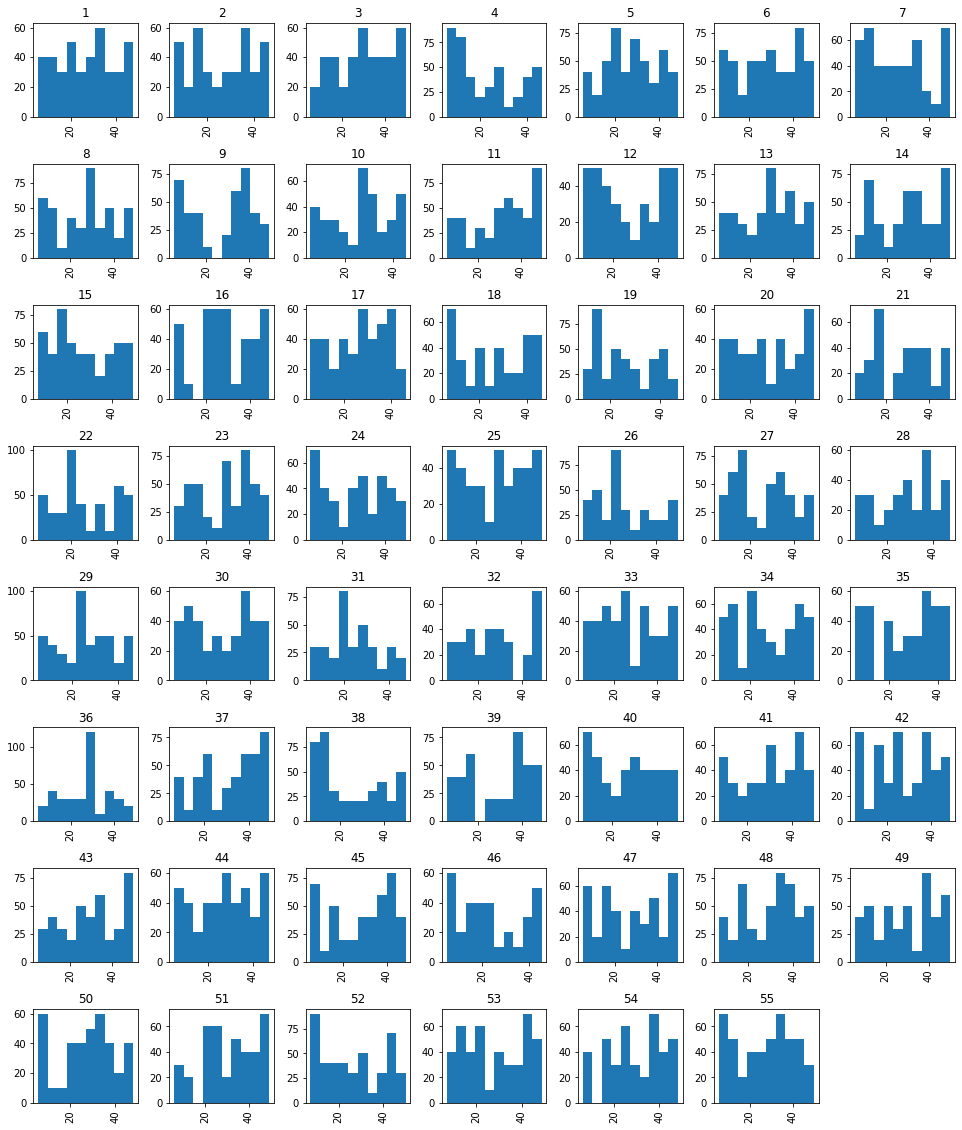

In [99]:
dfset2.MassLoadings.hist(by=dfset2.Analyte,figsize=(16,20))

In [100]:
dfset2.groupby(["Analyte"])["MassLoadings"].describe()

,count,mean,std,min,25%,50%,75%,max
Analyte,,,,,,,,
1,400.0,27.167410,12.381657,5.561266,16.236662,27.933858,37.475644,47.737612
2,380.0,26.688949,12.783958,5.736385,14.877607,28.032059,37.645670,46.865626
3,400.0,29.719910,12.732257,5.315723,19.994544,29.225856,40.956036,49.447703
4,430.0,22.358888,12.987025,5.670520,10.795857,18.933359,34.642035,46.441641
5,480.0,27.666152,11.779799,5.048239,19.005408,27.463012,36.343630,48.912447
6,500.0,28.943526,13.439206,6.179549,18.104174,30.346230,41.641523,49.640118
7,450.0,25.605431,13.735765,5.160788,13.925915,24.136723,34.838511,49.996738
8,430.0,26.660920,13.088411,5.455424,12.215150,28.261332,37.493804,49.062346
9,390.0,27.381929,13.804623,5.454936,12.341744,32.554447,39.089813,49.162986


In [101]:
a=dfset2.groupby(["Analyte"])["MassLoadings"].describe()
a.head()

,count,mean,std,min,25%,50%,75%,max
Analyte,,,,,,,,
1,400.0,27.167410,12.381657,5.561266,16.236662,27.933858,37.475644,47.737612
2,380.0,26.688949,12.783958,5.736385,14.877607,28.032059,37.645670,46.865626
3,400.0,29.719910,12.732257,5.315723,19.994544,29.225856,40.956036,49.447703
4,430.0,22.358888,12.987025,5.670520,10.795857,18.933359,34.642035,46.441641
5,480.0,27.666152,11.779799,5.048239,19.005408,27.463012,36.343630,48.912447


In [102]:
a['SNR']=a['mean']/a['std']
a

,count,mean,std,min,25%,50%,75%,max,SNR
Analyte,,,,,,,,,
1,400.0,27.167410,12.381657,5.561266,16.236662,27.933858,37.475644,47.737612,2.194166
2,380.0,26.688949,12.783958,5.736385,14.877607,28.032059,37.645670,46.865626,2.087691
3,400.0,29.719910,12.732257,5.315723,19.994544,29.225856,40.956036,49.447703,2.334222
4,430.0,22.358888,12.987025,5.670520,10.795857,18.933359,34.642035,46.441641,1.721633
5,480.0,27.666152,11.779799,5.048239,19.005408,27.463012,36.343630,48.912447,2.348610
6,500.0,28.943526,13.439206,6.179549,18.104174,30.346230,41.641523,49.640118,2.153663
7,450.0,25.605431,13.735765,5.160788,13.925915,24.136723,34.838511,49.996738,1.864143
8,430.0,26.660920,13.088411,5.455424,12.215150,28.261332,37.493804,49.062346,2.036987
9,390.0,27.381929,13.804623,5.454936,12.341744,32.554447,39.089813,49.162986,1.983533


In [103]:
a.describe()

,count,mean,std,min,25%,50%,75%,max,SNR
count,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000
mean,400.545455,27.596581,12.868062,5.880495,16.457634,28.005113,38.554466,48.601000,2.152000
std,44.614322,1.896564,0.788555,0.878073,2.923798,3.318433,2.605309,1.320792,0.190600
min,300.000000,22.358888,10.993076,5.003166,10.795857,18.933359,32.218927,45.104821,1.721633
25%,375.000000,26.592434,12.459687,5.240427,14.411604,25.630085,37.259120,47.897232,2.044699
50%,400.000000,27.416403,12.936042,5.591298,16.015630,28.261332,38.564120,49.062346,2.130227
75%,430.000000,28.968895,13.410253,6.141446,18.461286,30.083780,40.658426,49.548144,2.293597
max,500.000000,31.967391,14.109756,9.028093,22.764676,35.384715,43.452868,49.996738,2.590209


#### There is not much difference between the distribution of the analytes

### Removing the substrate effect

In [104]:
dfsub1=dfset2[dfset2['substrate']==1]
dfsub2=dfset2[dfset2['substrate']==2]
dfsub3=dfset2[dfset2['substrate']==3]
dfsub4=dfset2[dfset2['substrate']==4]
dfsub5=dfset2[dfset2['substrate']==5]
dfsub6=dfset2[dfset2['substrate']==6]
dfsub7=dfset2[dfset2['substrate']==7]
dfsub8=dfset2[dfset2['substrate']==8]
dfsub9=dfset2[dfset2['substrate']==9]

In [105]:
dfsub1.head(7)

,0,1,2,3,4,5,6,7,8,9,...,1694,1695,1696,1697,1698,1699,1700,Analyte,substrate,MassLoadings
60,0.011069,0.010992,0.010917,0.010843,0.010769,0.010681,0.010575,0.010471,0.010408,0.010376,...,0.013065,0.013041,0.013018,0.012992,0.012968,0.012942,0.012916,1,1,31.193506
61,0.010683,0.010607,0.010532,0.010459,0.010386,0.010302,0.010202,0.010103,0.010040,0.010006,...,0.012712,0.012688,0.012664,0.012638,0.012613,0.012587,0.012560,1,1,31.193506
62,0.011300,0.014219,0.014423,0.004017,0.009922,0.009655,0.008997,0.009198,0.015924,0.012615,...,0.014734,0.013895,0.010385,0.010918,0.014258,0.015810,0.012188,1,1,31.193506
63,0.014047,0.013045,0.008914,0.014425,0.010821,0.007273,0.007063,0.008696,0.010512,0.013451,...,0.014793,0.017371,0.011461,0.015977,0.008107,0.013775,0.013535,1,1,31.193506
64,-0.002864,0.024438,0.017836,0.011631,0.021825,0.008930,0.006930,0.025918,0.009493,0.022239,...,0.017530,0.005309,0.032732,0.017043,-0.000026,0.002686,0.008333,1,1,31.193506
65,0.007998,0.010611,0.011711,0.006205,0.007684,0.012105,0.010289,0.008516,0.010607,0.008916,...,0.014367,0.009852,0.017886,0.015313,0.013105,0.013331,0.016856,1,1,31.193506
66,0.009590,0.011465,0.010995,0.011521,0.010169,0.009473,0.011539,0.009521,0.010470,0.009464,...,0.016635,0.015019,0.012088,0.012988,0.012333,0.011835,0.012174,1,1,31.193506


### 1- CENTERING

In [106]:
mdfsub1=dfsub1.iloc[:,0:1701]
mdfsub2=dfsub2.iloc[:,0:1701]
mdfsub3=dfsub3.iloc[:,0:1701]
mdfsub4=dfsub4.iloc[:,0:1701]
mdfsub5=dfsub5.iloc[:,0:1701]
mdfsub6=dfsub6.iloc[:,0:1701]
mdfsub7=dfsub7.iloc[:,0:1701]
mdfsub8=dfsub8.iloc[:,0:1701]
mdfsub9=dfsub9.iloc[:,0:1701]

In [107]:
y1=subs.loc[0,:]
y2=subs.loc[1,:]
y3=subs.loc[2,:]
y4=subs.loc[3,:]
y5=subs.loc[4,:]
y6=subs.loc[5,:]
y7=subs.loc[6,:]
y8=subs.loc[7,:]
y9=subs.loc[8,:]

In [108]:
modsub1=mdfsub1.apply(lambda x : x -(np.sum(np.array(x)*np.array(y1))/np.sum(np.array(y1)*np.array(y1)))*y1,axis=1)
modsub2=mdfsub2.apply(lambda x : x -(np.sum(np.array(x)*np.array(y2))/np.sum(np.array(y2)*np.array(y2)))*y2,axis=1)
modsub3=mdfsub3.apply(lambda x : x -(np.sum(np.array(x)*np.array(y3))/np.sum(np.array(y3)*np.array(y3)))*y3,axis=1)
modsub4=mdfsub4.apply(lambda x : x -(np.sum(np.array(x)*np.array(y4))/np.sum(np.array(y4)*np.array(y4)))*y4,axis=1)
modsub5=mdfsub5.apply(lambda x : x -(np.sum(np.array(x)*np.array(y5))/np.sum(np.array(y5)*np.array(y5)))*y5,axis=1)
modsub6=mdfsub6.apply(lambda x : x -(np.sum(np.array(x)*np.array(y6))/np.sum(np.array(y6)*np.array(y6)))*y6,axis=1)
modsub7=mdfsub7.apply(lambda x : x -(np.sum(np.array(x)*np.array(y7))/np.sum(np.array(y7)*np.array(y7)))*y7,axis=1)
modsub8=mdfsub8.apply(lambda x : x -(np.sum(np.array(x)*np.array(y8))/np.sum(np.array(y8)*np.array(y8)))*y8,axis=1)
modsub9=mdfsub9.apply(lambda x : x -(np.sum(np.array(x)*np.array(y9))/np.sum(np.array(y9)*np.array(y9)))*y9,axis=1)

In [109]:
subdf=[modsub1,modsub2,modsub3,modsub4,modsub5,modsub6,modsub7,modsub8,modsub9]
cent_subs=pd.concat(subdf)
cent_subs.head()

,0,1,2,3,4,5,6,7,8,9,...,1691,1692,1693,1694,1695,1696,1697,1698,1699,1700
60,0.000386,0.000408,0.000429,0.000449,0.000468,0.000470,0.000451,0.000433,0.000453,0.000504,...,-0.001170,-0.001161,-0.001153,-0.001144,-0.001135,-0.001126,-0.001116,-0.001107,-0.001097,-0.001087
61,0.000324,0.000344,0.000363,0.000381,0.000398,0.000401,0.000385,0.000370,0.000388,0.000434,...,-0.001086,-0.001079,-0.001072,-0.001064,-0.001057,-0.001049,-0.001041,-0.001033,-0.001025,-0.001017
62,0.000129,0.003153,0.003458,-0.006850,-0.000848,-0.001021,-0.001588,-0.001298,0.005516,0.002293,...,-0.005334,-0.002616,0.000887,-0.000122,-0.000927,-0.004403,-0.003833,-0.000457,0.001131,-0.002453
63,0.003109,0.002209,-0.001824,0.003783,0.000274,-0.003182,-0.003302,-0.001582,0.000320,0.003344,...,-0.000398,0.001017,0.001215,0.000245,0.002858,-0.003019,0.001533,-0.006302,-0.000598,-0.000801
64,-0.013545,0.013857,0.007351,0.001239,0.011527,-0.001279,-0.003192,0.015883,-0.000459,0.012369,...,-0.000226,-0.008603,-0.012210,0.003325,-0.008864,0.018592,0.002939,-0.014096,-0.011350,-0.005666


### CENTERING AND NORMALIZATION

In [110]:
# Using sklearn
from sklearn.preprocessing import normalize
b=cent_subs.iloc[:,0:1701]
b.head()

,0,1,2,3,4,5,6,7,8,9,...,1691,1692,1693,1694,1695,1696,1697,1698,1699,1700
60,0.000386,0.000408,0.000429,0.000449,0.000468,0.000470,0.000451,0.000433,0.000453,0.000504,...,-0.001170,-0.001161,-0.001153,-0.001144,-0.001135,-0.001126,-0.001116,-0.001107,-0.001097,-0.001087
61,0.000324,0.000344,0.000363,0.000381,0.000398,0.000401,0.000385,0.000370,0.000388,0.000434,...,-0.001086,-0.001079,-0.001072,-0.001064,-0.001057,-0.001049,-0.001041,-0.001033,-0.001025,-0.001017
62,0.000129,0.003153,0.003458,-0.006850,-0.000848,-0.001021,-0.001588,-0.001298,0.005516,0.002293,...,-0.005334,-0.002616,0.000887,-0.000122,-0.000927,-0.004403,-0.003833,-0.000457,0.001131,-0.002453
63,0.003109,0.002209,-0.001824,0.003783,0.000274,-0.003182,-0.003302,-0.001582,0.000320,0.003344,...,-0.000398,0.001017,0.001215,0.000245,0.002858,-0.003019,0.001533,-0.006302,-0.000598,-0.000801
64,-0.013545,0.013857,0.007351,0.001239,0.011527,-0.001279,-0.003192,0.015883,-0.000459,0.012369,...,-0.000226,-0.008603,-0.012210,0.003325,-0.008864,0.018592,0.002939,-0.014096,-0.011350,-0.005666


In [111]:
#normalize(b)
b1=b.apply(lambda x: x/(x**2).sum()**.5, axis=1)
b1.head()

,0,1,2,3,4,5,6,7,8,9,...,1691,1692,1693,1694,1695,1696,1697,1698,1699,1700
60,0.005722,0.006050,0.006365,0.006668,0.006937,0.006967,0.006688,0.006424,0.006721,0.007478,...,-0.017356,-0.017231,-0.017101,-0.016972,-0.016838,-0.016703,-0.016559,-0.016420,-0.016276,-0.016128
61,0.005632,0.005975,0.006307,0.006625,0.006913,0.006963,0.006696,0.006436,0.006745,0.007537,...,-0.018861,-0.018740,-0.018615,-0.018489,-0.018358,-0.018227,-0.018087,-0.017951,-0.017811,-0.017666
62,0.000992,0.024169,0.026508,-0.052515,-0.006504,-0.007830,-0.012174,-0.009949,0.042291,0.017579,...,-0.040894,-0.020054,0.006800,-0.000937,-0.007107,-0.033756,-0.029382,-0.003505,0.008672,-0.018805
63,0.025279,0.017956,-0.014827,0.030757,0.002231,-0.025867,-0.026845,-0.012859,0.002603,0.027184,...,-0.003233,0.008268,0.009875,0.001994,0.023232,-0.024548,0.012460,-0.051240,-0.004864,-0.006512
64,-0.032444,0.033191,0.017607,0.002969,0.027610,-0.003064,-0.007645,0.038044,-0.001100,0.029627,...,-0.000542,-0.020606,-0.029247,0.007964,-0.021231,0.044535,0.007040,-0.033765,-0.027186,-0.013571


In [112]:
a1=np.array(dfsub1['Analyte'].values.tolist())
a2=np.array(dfsub2['Analyte'].values.tolist())
a3=np.array(dfsub3['Analyte'].values.tolist())
a4=np.array(dfsub4['Analyte'].values.tolist())
a5=np.array(dfsub5['Analyte'].values.tolist())
a6=np.array(dfsub6['Analyte'].values.tolist())
a7=np.array(dfsub7['Analyte'].values.tolist())
a8=np.array(dfsub8['Analyte'].values.tolist())
a9=np.array(dfsub9['Analyte'].values.tolist())
y=np.concatenate((a1,a2,a3,a4,a5,a6,a7,a8,a9),axis=None)
print(np.unique(y,return_counts=True))

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55]), array([400, 380, 400, 430, 480, 500, 450, 430, 390, 350, 430, 350, 430,
       420, 470, 390, 400, 340, 380, 340, 310, 420, 430, 380, 370, 350,
       420, 300, 450, 370, 330, 320, 400, 430, 380, 370, 430, 400, 380,
       420, 400, 450, 400, 430, 430, 320, 400, 470, 430, 370, 390, 430,
       430, 390, 470], dtype=int64))


In [113]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
# We will find by inspection the best k according to the classifier accuracy on the test set
accuracies = []
X=b1.iloc[:,0:1701]
# We will find by inspection the best k according to the classifier accuracy on the test set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=0)
for k in range(1, 40, 2):
    # Entrenar el clasificador  con el valor actual de  `k`
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(X_train, y_train)

    # Evaluar los modelos e imprimiendo sus predicciones
    score = neigh.score(X_test, y_test)
    print("k=%d, accuracy=%.2f%%" % (k, score * 100))
    accuracies.append(score)

k=1, accuracy=78.05%
k=3, accuracy=78.23%
k=5, accuracy=78.12%
k=7, accuracy=77.42%
k=9, accuracy=75.69%
k=11, accuracy=74.06%
k=13, accuracy=71.88%
k=15, accuracy=69.68%
k=17, accuracy=67.75%
k=19, accuracy=66.43%
k=21, accuracy=65.12%
k=23, accuracy=63.53%
k=25, accuracy=61.82%
k=27, accuracy=60.01%
k=29, accuracy=58.62%
k=31, accuracy=56.88%
k=33, accuracy=54.74%
k=35, accuracy=53.25%
k=37, accuracy=51.34%
k=39, accuracy=49.95%


In [114]:
#metrics for k=3
import time
from sklearn.metrics import classification_report, confusion_matrix, f1_score, precision_score, roc_auc_score
neigh = KNeighborsClassifier(n_neighbors=3)
X=b1.iloc[:,0:1701]
neigh.fit(X, y) 
print("Accuracy estimated by resubstitution", neigh.score(X,y))
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=0)
start_time = time.time()
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train) 
#Calculating  metrics of prediction
predictions = neigh.predict(X_test)
print("F1-score is=",f1_score(y_test,predictions, average="weighted"))
print("The accuracy is=",neigh.score(X_test,y_test))
print("--- %s seconds ---" % (time.time() - start_time))

Accuracy estimated by resubstitution 0.8541534271448026
F1-score is= 0.7833540392988043
The accuracy is= 0.7823422605537903
--- 6.73549485206604 seconds ---


In [115]:
#Calculating metrics for each class
print("EVALUATION ON TESTING DATA")
print(classification_report(y_test, predictions))

EVALUATION ON TESTING DATA
              precision    recall  f1-score   support

           1       0.65      0.83      0.73        82
           2       0.55      0.66      0.60        71
           3       0.71      0.91      0.80        82
           4       0.59      0.72      0.65        82
           5       0.73      0.90      0.81       101
           6       0.68      0.92      0.78       106
           7       0.66      0.81      0.73        84
           8       0.63      0.73      0.67        84
           9       0.75      0.84      0.79        70
          10       0.62      0.73      0.67        60
          11       0.75      0.86      0.80        80
          12       0.68      0.77      0.72        65
          13       0.84      0.79      0.82        96
          14       0.77      0.76      0.77        92
          15       0.84      0.78      0.81        86
          16       0.67      0.67      0.67        73
          17       0.78      0.77      0.77        82


In [116]:
from sklearn.linear_model import LogisticRegression
import time
X=b1.iloc[:,0:1701]
#model.fit(X,y)
#model.score(X,y)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=0)
start_time = time.time()
model = LogisticRegression(solver="newton-cg",multi_class="multinomial",max_iter=5000)
model.fit(X_train,y_train)
#Calculating  metrics of prediction
predictions = model.predict(X_test)
#print(predictions)
#print("F1-score is=",f1_score(y_test,predictions, average="weighted"))
#print("precision=",precision_score(y_test,predictions,average="weighted"))
print("The accuracy is=",model.score(X_test,y_test))
print("--- %s seconds ---" % (time.time() - start_time))

The accuracy is= 0.728551974580118
--- 40.89030623435974 seconds ---


In [117]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, f1_score, precision_score, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn import svm
#y=dfsub1['Analyte']
#print(y.value_counts())
X=b1.iloc[:,0:1701]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)
scaler = StandardScaler()
scaler.fit(X_train)
X_train= scaler.transform(X_train)
X_test = scaler.transform(X_test)
#clf=svm.svmSVC(max_iter=2000)
start_time = time.time()
clf=svm.SVC()
clf.fit(X_train, y_train) 
predictions = clf.predict(X_test)
print("F1-score is=",f1_score(y_test,predictions, average="weighted"))
print("precision=",precision_score(y_test,predictions,average="weighted"))
print("The accuracy is=",clf.score(X_test,y_test))
print("--- %s seconds ---" % (time.time() - start_time))

F1-score is= 0.7277709209058258
precision= 0.8543567757578654
The accuracy is= 0.6654561960962324
--- 815.377660036087 seconds ---
